In [180]:
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
df =  pd.read_csv('train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [182]:
group_by_passanger_count  = df.groupby('passenger_count').agg({'id': 'count'}).sort_values('id', ascending = False).reset_index()
group_by_passanger_count.head()

,passenger_count,id
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333


Text(0.5, 1.0, 'Соотношение количества пассажиров к поездкам')

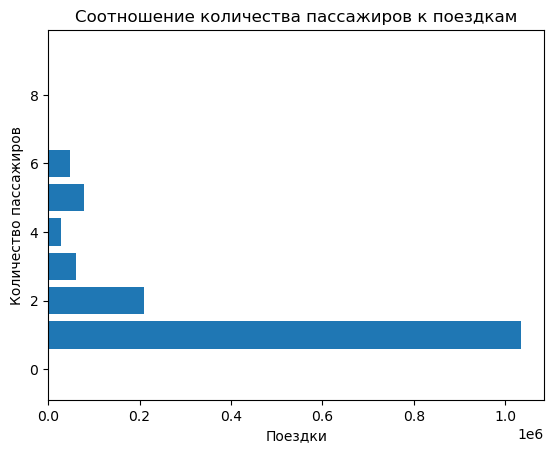

In [183]:
plt.barh(group_by_passanger_count['passenger_count'], group_by_passanger_count['id'])
plt.xlabel('Поездки')
plt.ylabel('Количество пассажиров')
plt.title('Соотношение количества пассажиров к поездкам')

In [184]:
def strtodate(row):
    date = row['pickup_datetime'].split('-')[0] + '-' + row['pickup_datetime'].split('-')[1]
    return date

In [185]:
df['year-month']= df.apply(strtodate, axis = 1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year-month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03


In [186]:
trips_by_year = df.groupby('year-month').agg({'id':'count'})
trips_by_year.head()

,id
year-month,
2016-01,229707
2016-02,238300
2016-03,256189
2016-04,251645
2016-05,248487


<AxesSubplot:xlabel='year-month'>

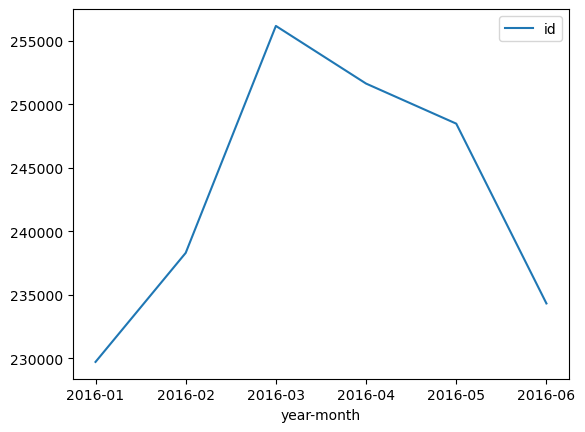

In [189]:
trips_by_year.plot()

<AxesSubplot:xlabel='year-month'>

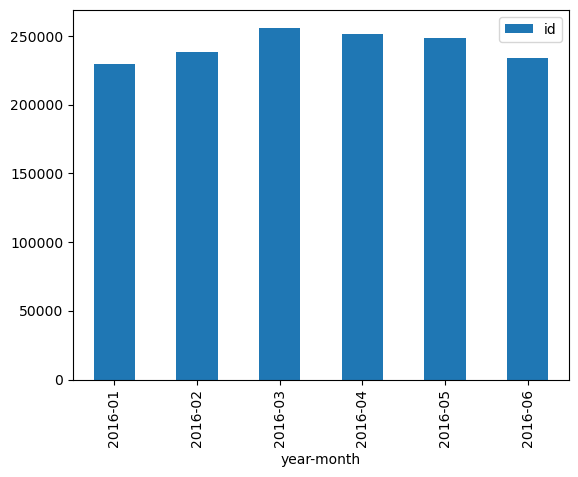

In [188]:
vendor_by_year.plot(kind = 'bar')

In [190]:
vendors = df.groupby(['year-month', 'vendor_id']).agg({'id':'count'})
vendors1 = vendors.unstack('vendor_id')
vendors1.head()

id        
vendor_id        1       2
year-month                
2016-01     105602  124105
2016-02     110210  128090
2016-03     118813  137376
2016-04     117710  133935
2016-05     116130  132357

<AxesSubplot:xlabel='year-month'>

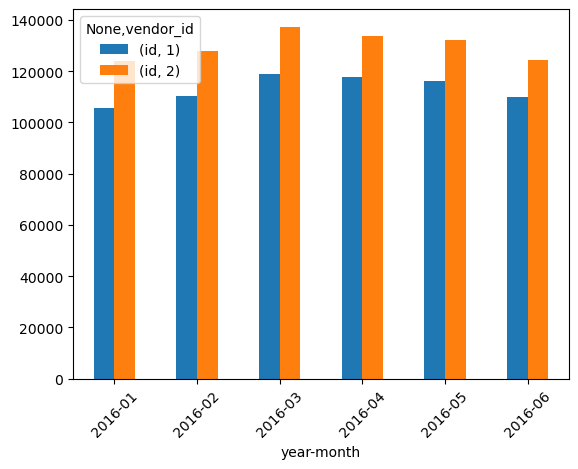

In [191]:
vendors1.plot(kind = 'bar', rot = 45, stacked = False)

In [192]:
vendor = df.groupby('vendor_id').agg({'id':'count'})

<AxesSubplot:ylabel='id'>

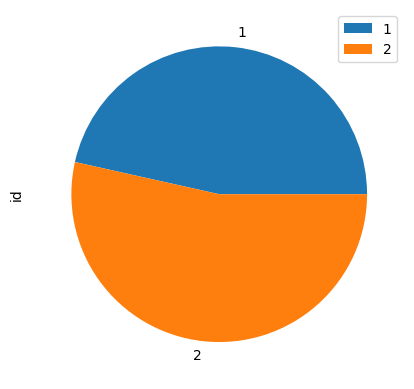

In [193]:
vendor.plot(kind =  'pie', y = 'id')

<AxesSubplot:>

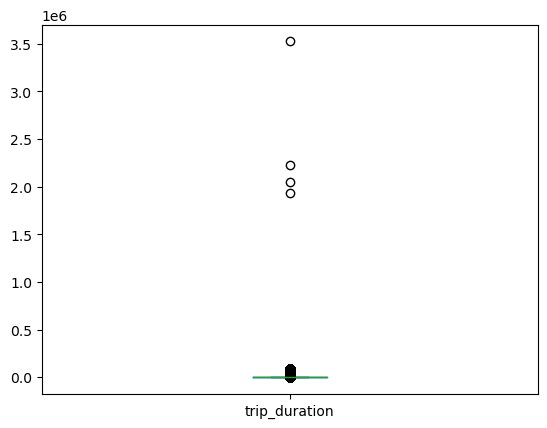

In [194]:

df.loc[:,'trip_duration_h'] = df['trip_duration']/3600
df.head()
df['trip_duration'].plot(kind = 'box')


<AxesSubplot:>

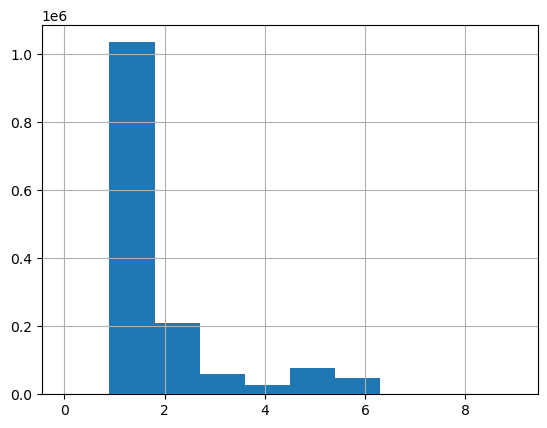

In [195]:
df.passenger_count.hist()
